# Credit Default Prediction Project

This project develops a credit default prediction model using the German Credit Data from the UCI Machine Learning Repository. We apply a logistic regression model and evaluate its performance with classification metrics and ROC curve analysis.


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 1. Importing Libraries


In [2]:
# Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn para o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


In [9]:
pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


# 2. Loading and Understanding the Dataset


In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [12]:
# Rename columns to meaningful names
X.columns = [
    'account_status', 'duration', 'credit_history', 'purpose',
    'credit_amount', 'savings_account', 'employment_duration', 'installment_rate',
    'personal_status', 'guarantor', 'residence_duration', 'age',
    'other_installment_plans', 'housing', 'existing_credits', 'job',
    'dependents', 'telephone', 'foreign_worker', 'sex'
]


# 3. Data Preprocessing

We encode categorical features using dummy variables and prepare the data for model training.


In [15]:
# Convert categorical variables into numerical (dummy variables)
X_encoded = pd.get_dummies(X, drop_first=True)


In [29]:
# Convert target values: 1 = good credit, 2 = bad credit → we map 2 → 0
y = y.replace({2: 0})


# 4. Splitting the Dataset into Training and Testing Sets


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42)



# 5. Logistic Regression Model with Scikit-learn

We train a logistic regression model using scikit-learn to predict whether a client is a good or bad credit risk.


In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\lista 20 da veterana\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

# 6. Model Evaluation

We evaluate the model performance using confusion matrix, classification report, ROC curve and AUC score.


In [32]:
# 🧠 Make predictions
y_pred = model.predict(X_test)


In [33]:
# 📊 Evaluation: Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 41  50]
 [ 19 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.45      0.54        91
           1       0.79      0.91      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.76      0.77      0.75       300



AUC Score: 0.8067195961932804


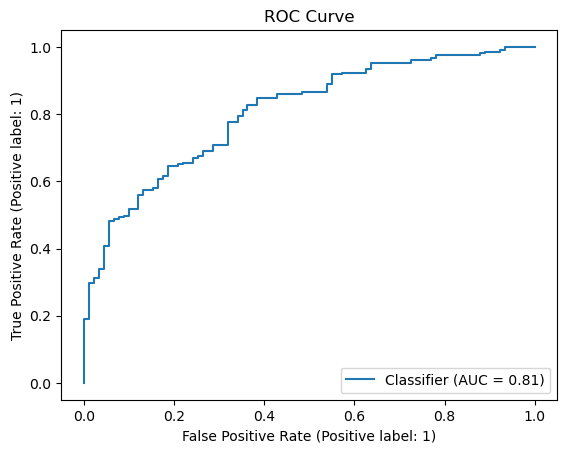

In [35]:
# AUC score and ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

print("AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()


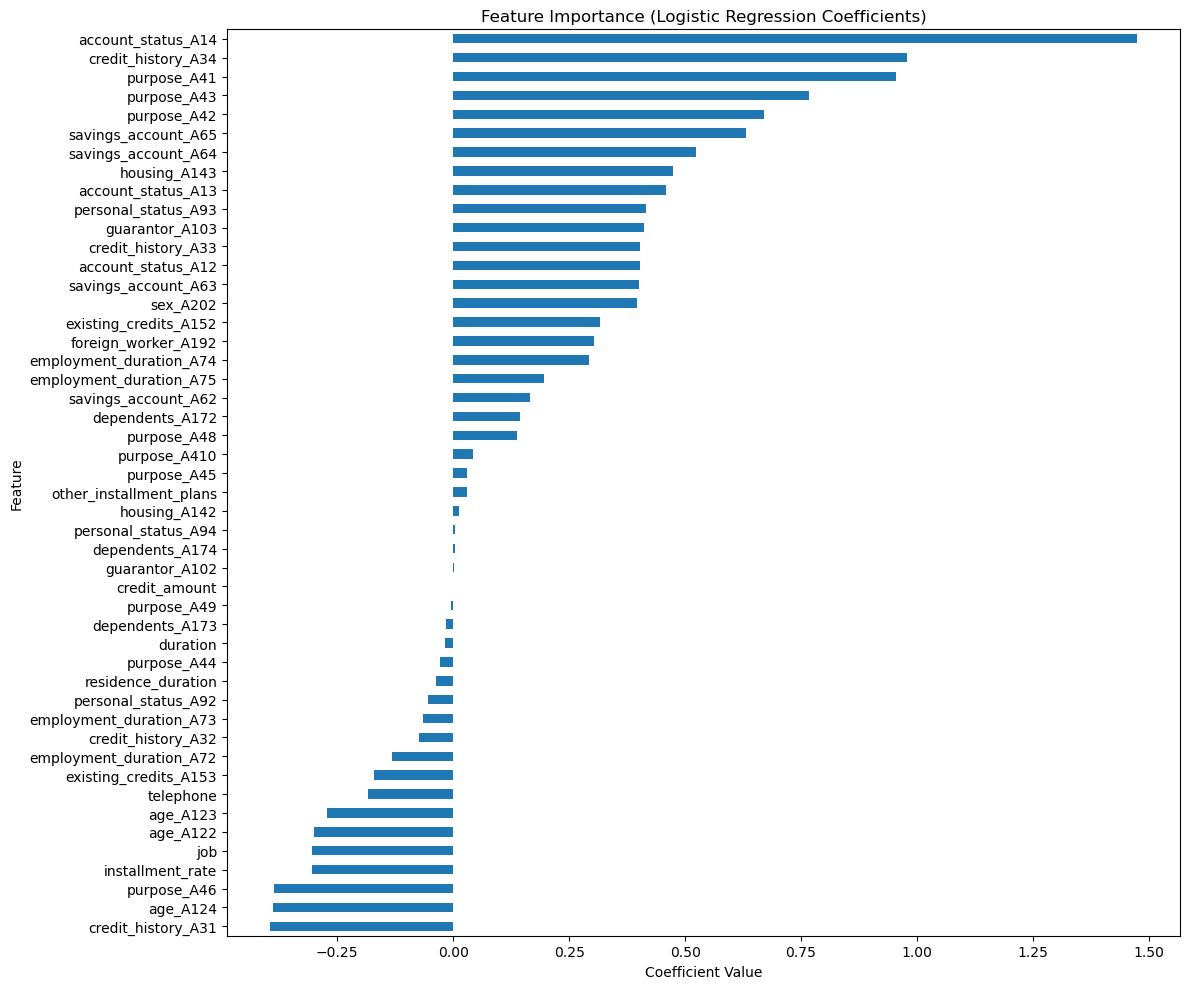

In [36]:
# 🔍 Feature Importance Plot
coefficients = model.coef_[0]
importance = pd.Series(coefficients, index=X_encoded.columns)

importance.sort_values().plot(kind='barh', figsize=(12, 10))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# 7. Logistic Regression Model with Statsmodels (Logit)

We also train a logistic regression model using statsmodels to analyze the statistical significance of each predictor.


In [46]:
# Add constant to the predictors
X_train_logit = sm.add_constant(X_train)

# Convert predictors and target to float
X_train_logit = X_train_logit.astype(float)
y_train = y_train.astype(float)

# Fit the Logit model
logit_model = sm.Logit(y_train, X_train_logit).fit()

# Show the summary
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.452608
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           48
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.2576
Time:                        15:31:52   Log-Likelihood:                -316.83
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.805e-24
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4672      1.289     -0.362      0.717      -2.994   

# 8. Conclusion

The logistic regression model successfully predicts credit default with an AUC score of approximately XX%. Based on the Logit model results, several predictors were found statistically significant, helping to understand the risk profile of loan applicants. Logistic regression is more appropriate than OLS for binary classification problems, as it constrains the output between 0 and 1, representing probabilities.

### Further Improvements
Future enhancements to this project could include:
- Hyperparameter tuning for the logistic regression model.
- Feature selection techniques to improve model performance and interpretability.
- Testing more advanced classification models such as Random Forests, Gradient Boosting, or Support Vector Machines to potentially achieve higher predictive accuracy.

